# Data Management for Data Science Final Project

In [3]:
# import relevant Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Data exploration

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
#shape returns row and col values
rows,col = diabetes_df.shape
print("Samples: ",rows)
print("Features: ", col)
diabetes_df.info()
diabetes_df.head(10)

Samples:  70692
Features:  22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  fl

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


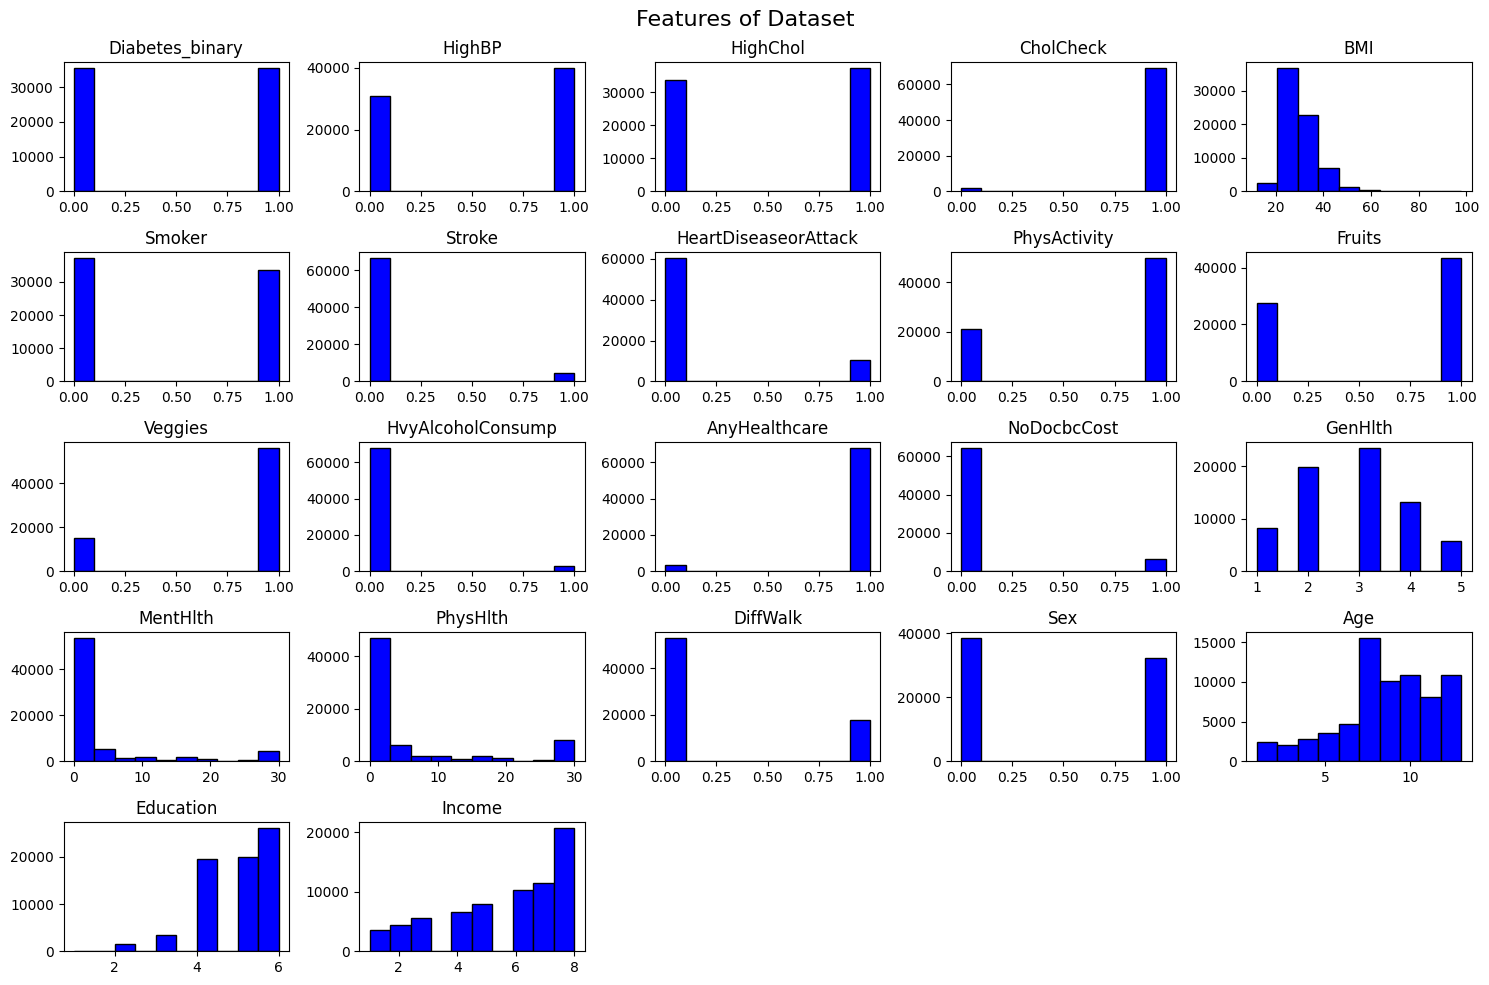

In [5]:
# Set up the plot
plt.figure(figsize=(15, 10))
plt.suptitle("Features of Dataset", fontsize=16)
# Loop through each column to create a histogram
for i, column in enumerate(diabetes_df.columns):
    plt.subplot(5, 5, i + 1)
    plt.hist(diabetes_df[column], bins=10, color='blue', edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()

Feature descriptions(from data card):  
Diabetes_binary: 0 = no diabetes, 1 = prediabetes or diabetes  
HighBP: 0 = no high BP, 1 = high BP  
HighChol: 0 = no high cholesterol, 1 = high cholesterol  
CholCheck: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years  
BMI: Body Mass Index  
Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes  
Stroke: Had a stroke? 0 = no, 1 = yes  
HeartDiseaseorAttack: Coronary heart disease (CHD) or myocardial infarction (MI)? 0 = no, 1 = yes  
PhysActivity: Physical activity in past 30 days - not including job? 0 = no, 1 = yes  
Fruits: Consume Fruit 1 or more times per day? 0 = no, 1 = yes  
Veggies: Consume Vegetables 1 or more times per day? 0 = no 1 = yes  
HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1, = yes  
AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.? 0 = no, 1 = yes  
NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes  
GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor  
MentHlth: days of poor mental health scale 1-30 days  
PhysHlth: physical illness or injury days in past 30 days scale 1-30  
DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
Sex: 0 = female 1 = male  
Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older  
Education: Education level (EDUCA see codebook) scale 1-6  
Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more    
  
Will need to normalize the non categorical variables and all categorical variables are already encoded to numerical values

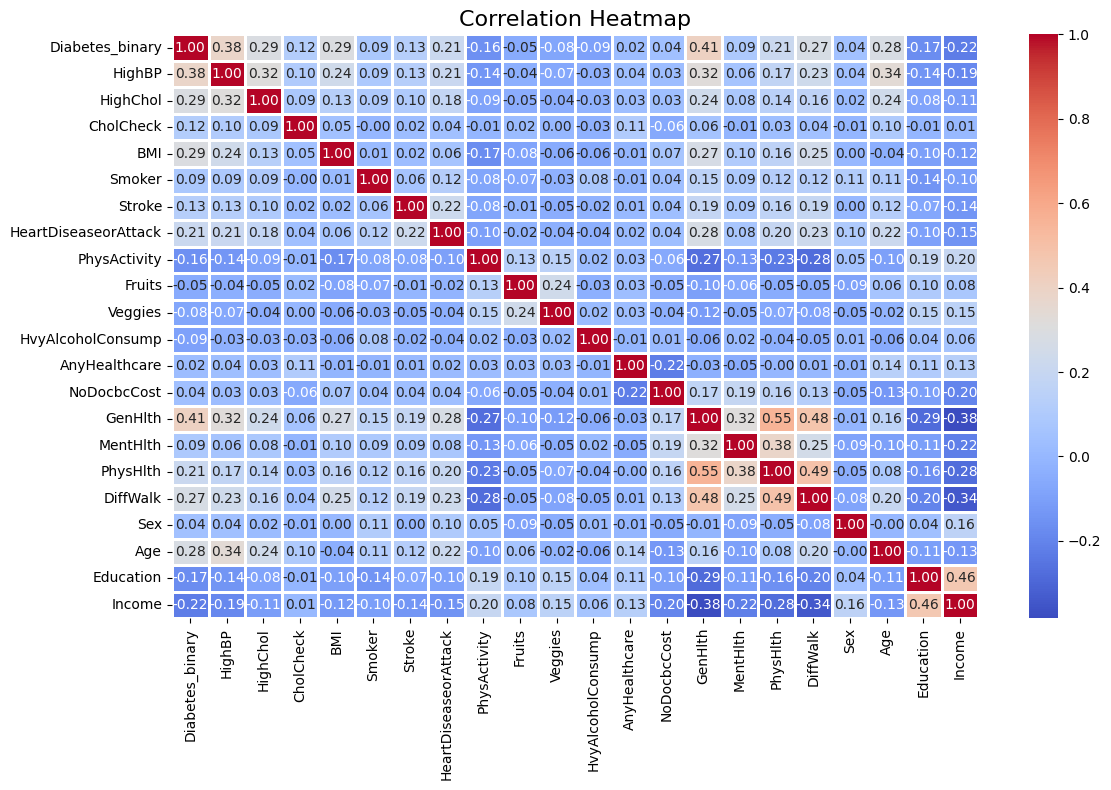

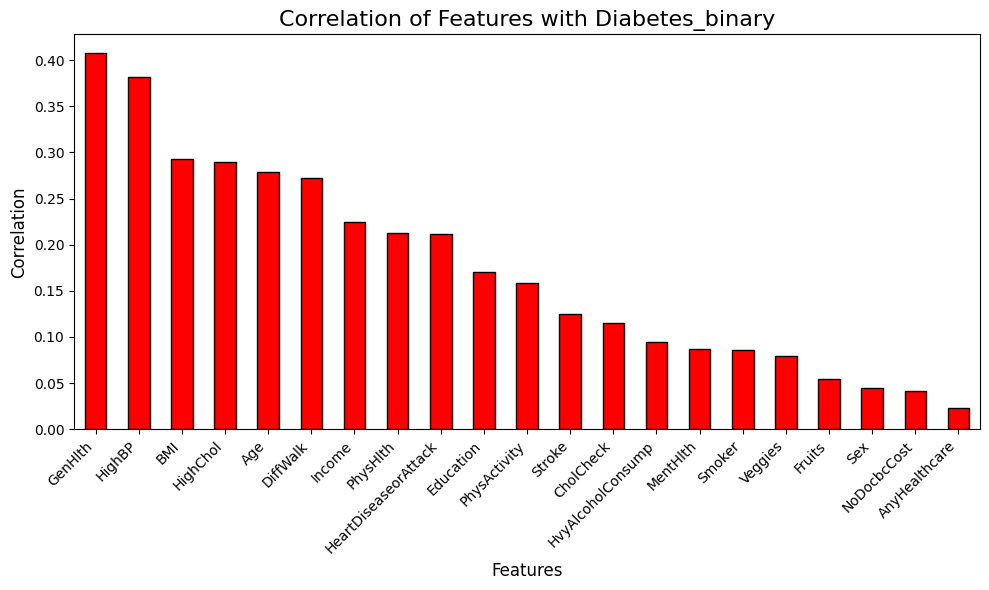

In [ ]:
#Calculate the corr matrix
correlation_matrix = diabetes_df.corr()
#Set up the matplotlib figure
plt.figure(figsize=(12, 8))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.75)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

#Get absolute values of correlations and sort
abs_corr = correlation_matrix.abs()
correlations_with_target = abs_corr["Diabetes_binary"].sort_values(ascending=False)
correlations_with_target = correlations_with_target.drop(["Diabetes_binary"])
# Plot the correlations with the target variable
plt.figure(figsize=(10, 6))
correlations_with_target.plot(kind='bar', color='red', edgecolor='black')
# Add titles and labels
plt.title('Correlation of Features with Diabetes_binary', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


### Pre-Processing

In [7]:
print(diabetes_df.isna().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


No Missing Values no need to replace

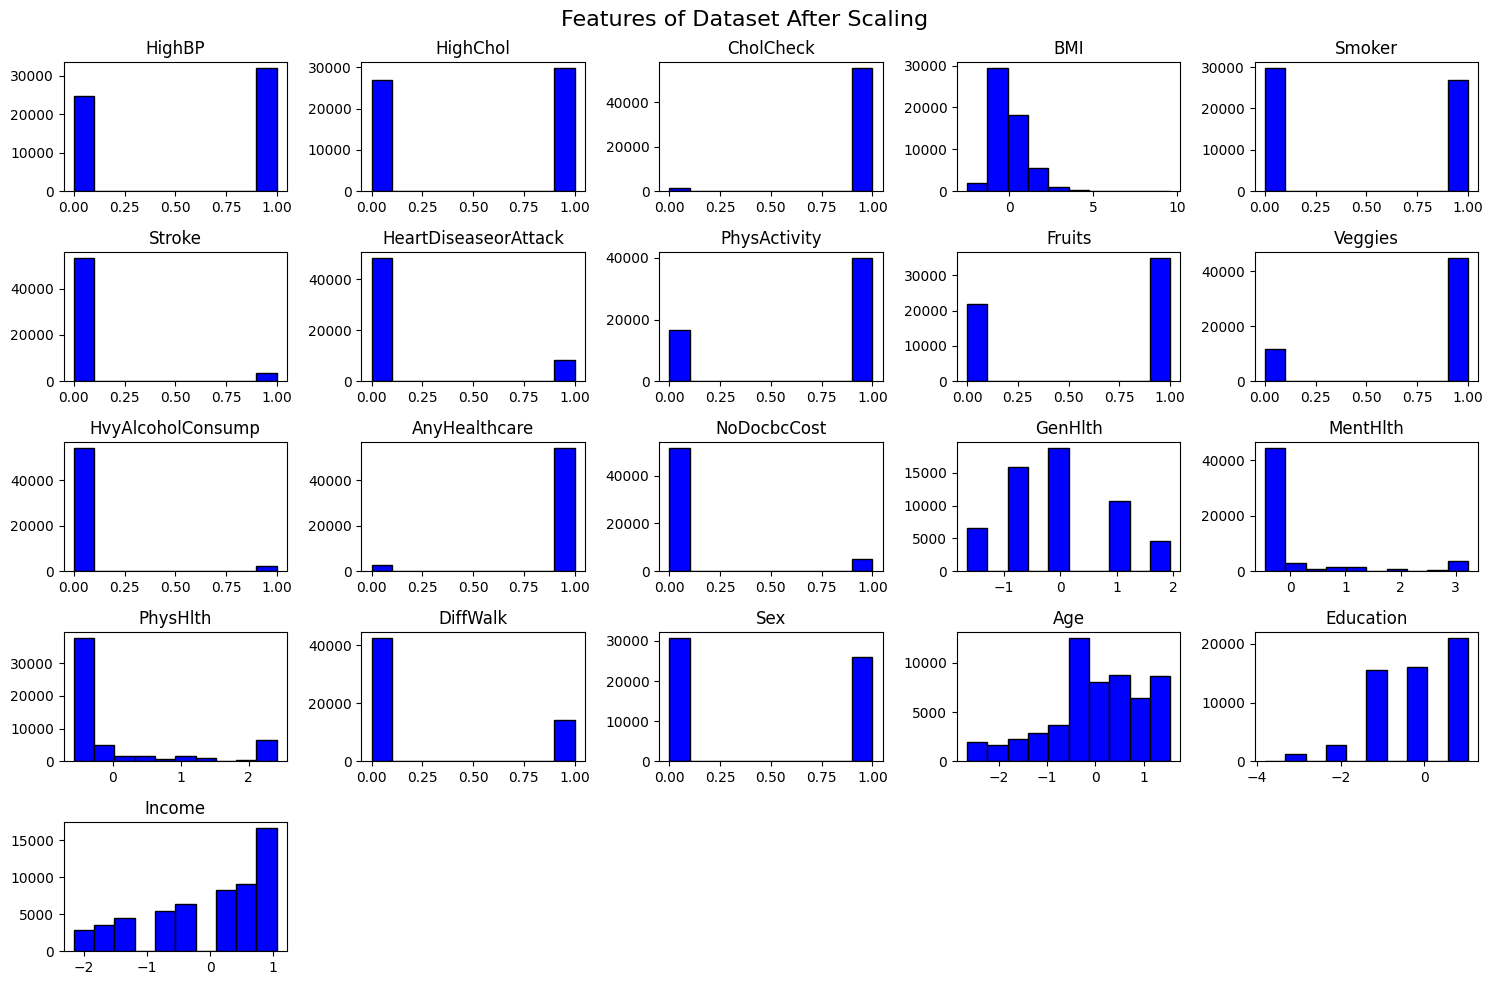

In [8]:
X = diabetes_df.drop(['Diabetes_binary'], axis=1)
Y = diabetes_df['Diabetes_binary']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Need to scale some numerical variables such as BMI, GenHlth, MentHlth, PhysHlth, Age, Education and Income
#To avoid data leakage scale based off of the training data and do the same for the test
cols_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform the training data then transform testing data on fitted scalar
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Set up the plot
plt.figure(figsize=(15, 10))
plt.suptitle("Features of Dataset After Scaling", fontsize=16)
# Loop through each column to create a histogram
for i, column in enumerate(X_train.columns):
    plt.subplot(5, 5, i + 1)
    plt.hist(X_train[column], bins=10, color='blue', edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()

## Random Forest Classifier

Accuracy: 0.7364735837046468
F1 Score 0.7459083469721768


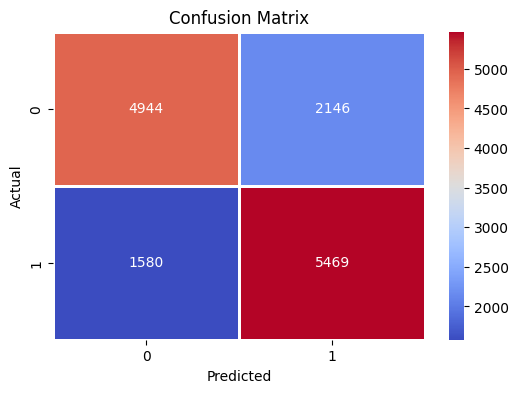

In [9]:
modelRFC = RandomForestClassifier(random_state=69) #Set random state to get reporducable result
modelRFC.fit(X_train,Y_train)
Y_predict = modelRFC.predict(X_test)

# Compare the predictions with the actual values (Y_test)
accuracy = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
conf_matrix = confusion_matrix(Y_test, Y_predict)
# Evaluation
print("Accuracy:", accuracy)
print("F1 Score", f1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=0.75)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K Nearest Neighbor

Accuracy: 0.7166702029846523
F1 Score 0.7242566079295154


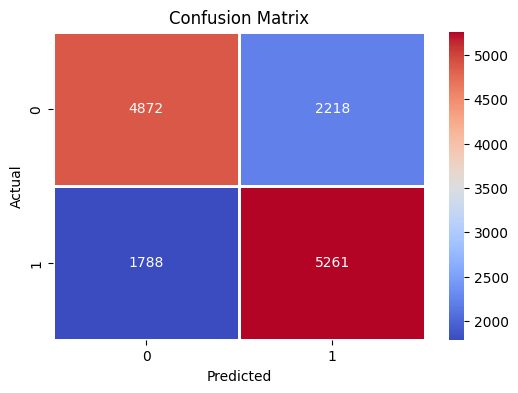

In [10]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train,Y_train)
Y_predict = modelKNN.predict(X_test)
# Compare the predictions with the actual values (Y_test)
accuracy = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
conf_matrix = confusion_matrix(Y_test, Y_predict)
# Evaluation
print("Accuracy:", accuracy)
print("F1 Score", f1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=0.75)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

Accuracy: 0.7482141594172148
F1 Score 0.7529150471960022


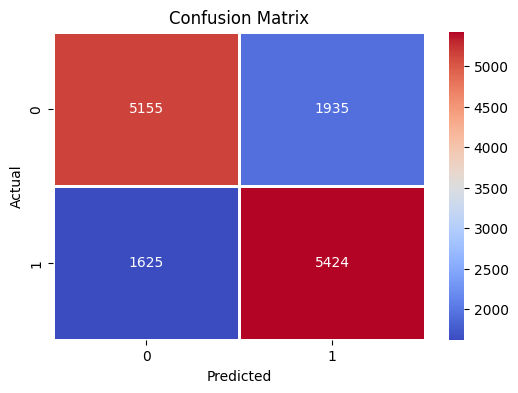

In [11]:
modelLR = LogisticRegression(random_state=69) #Set random state to get reporducable result
modelLR.fit(X_train,Y_train)
Y_predict = modelLR.predict(X_test)
# Compare the predictions with the actual values (Y_test)
accuracy = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
conf_matrix = confusion_matrix(Y_test, Y_predict)
# Evaluation
print("Accuracy:", accuracy)
print("F1 Score", f1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=0.75)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Classifier

Accuracy: 0.7484263384963576
F1 Score 0.75850363229004


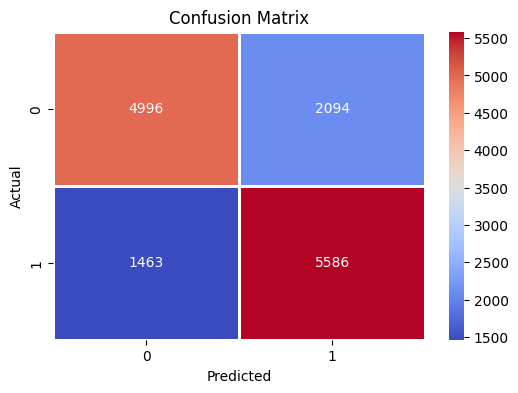

In [12]:
modelSVC = SVC(random_state=69,kernel='linear') #Set random state to get reporducable result
modelSVC.fit(X_train,Y_train)
Y_predict = modelSVC.predict(X_test)
# Compare the predictions with the actual values (Y_test)
accuracy = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
conf_matrix = confusion_matrix(Y_test, Y_predict)
# Evaluation
print("Accuracy:", accuracy)
print("F1 Score", f1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=0.75)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVC had the highest accuracy and f1 score so use that model for the website

In [ ]:
from pickle import dump
with open("model_file.pkl", "wb") as f:
    dump(modelSVC, f, protocol=5)

with open("scaler_file.pkl", "wb") as f:
    dump(scaler, f, protocol=5)